In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [14]:
img = cv2.imread('./foodd.jpg')

In [15]:
rows, cols, ch = img.shape

In [ ]:
pt1 = np.float32([[0, 0], [0, row], [col, 0], [col, row]])
pt2 = np.float32([[150, 80], ])

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

file_name = '../img/fish.jpg'
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

# ---② 변환 전 좌표를 이미지에 표시
cv2.circle(img, (100,50), 5, (255,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,200), 5, (0,0,255), -1)

#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)
#---④ 어핀 변환 적용
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))

#---⑤ 결과 출력
cv2.imshow('origin',img)
cv2.imshow('affin', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

# CV

In [17]:
import cv2
import numpy as np

In [20]:
img = cv2.imread('foodd.jpg')

In [21]:
img.shape

(2000, 3008, 3)

In [22]:
row, col = img.shape[:2]

In [23]:
pt1 = np.float32([[500, 520], [500, row], [col, 520], [col, row]])
pt2 = np.float32([[150, 80], [100, row - 80], [col - 150, 80], [col - 100, row - 80]])


In [24]:
cv2.circle(img, (0, 0), 15, (255, 0, 0), -1)
cv2.circle(img, (0, row), 15, (0, 255, 0), -1)
cv2.circle(img, (col, 0), 15, (0, 0, 255), -1)
cv2.circle(img, (col, row), 15, (0, 0, 0), -1)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [25]:
# 원근 변환행렬 계산 및 적용

matrix = cv2.getPerspectiveTransform(pt1, pt2)
perspective = cv2.warpPerspective(img, matrix, (col, row))

In [26]:
cv2.imshow('Origin', img)
cv2.imshow('Perspective', perspective)
cv2.waitKey()
cv2.destroyAllWindows()

---------

In [33]:
import skimage.data
import matplotlib.pyplot as plt

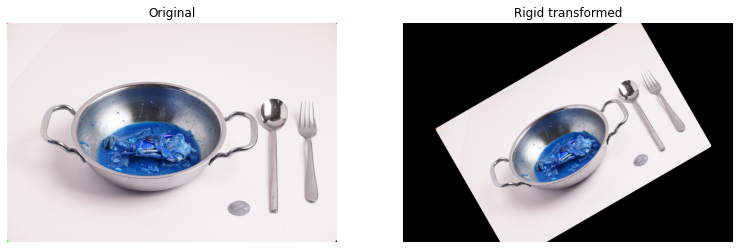

In [36]:
H = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.7)
H[:, 2] += 50
H

dst = cv2.warpAffine(img, H, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (13, 13))
ax1.set_title('Original')
ax1.axis('off')
ax1.imshow(img, cmap = plt.cm.gray)
ax2.set_title('Rigid transformed')
ax2.axis('off')
ax2.imshow(dst, cmap = plt.cm.gray)
plt.show()

In [37]:
pts1 = np.float32([[581, 1555], [2010, 1555], [581, 530], [2010, 530]])
pts2 = np.float32([[581, 1455], [2010, 1455], [581, 430], [2010, 430]])

H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
H_perspective

array([[ 1.00000000e+00,  9.01903807e-17, -7.22650426e-14],
       [-1.07925559e-16,  1.00000000e+00, -1.00000000e+02],
       [-5.82123800e-20,  1.55233013e-19,  1.00000000e+00]])

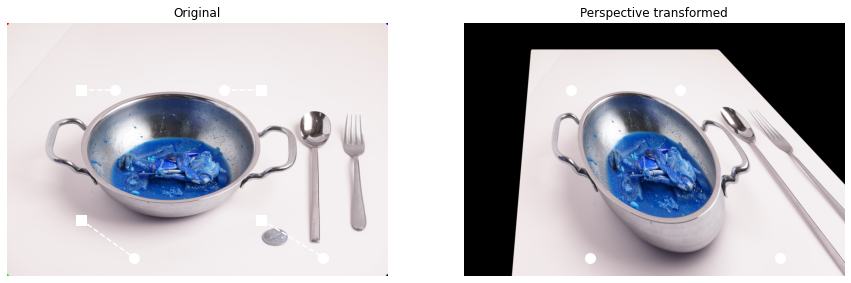

In [47]:
# 좌하, 우하, 좌상, 우상
pts1 = np.float32([[581, 1555], [2010, 1555], [581, 530], [2010, 530]])
pts2 = np.float32([[1000, 1855], [2500, 1855], [851, 530], [1710, 530]])

H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
H_perspective

img2 = cv2.warpPerspective(img, H_perspective, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (15, 15))
pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

ax1.set_title('Original')
ax1.imshow(img, cmap = plt.cm.bone)
ax1.scatter(pts_x, pts_y, c = 'w', s = 100, marker = 's')
ax1.scatter(pts_x_, pts_y_, c = 'w', s = 100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis = -1))),
        list(zip(*np.stack((pts_y, pts_y_), axis = -1))), '--', c = 'w')
ax1.axis('off')

ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()